In [56]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/antoineguerrini/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/antoineguerrini/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [57]:
#d = pd.read_csv('/Users/antoineguerrini/Desktop/Train_ML.csv', error_bad_lines=False)

In [58]:
#snipet = d.sample(frac=0.045, replace=True, random_state=42)

In [59]:
#snipet.to_excel('Snipet_ML.xlsx')

In [639]:
df = pd.read_excel('/Users/antoineguerrini/SnipetML.xlsx', error_bad_lines=False)

In [640]:
df.head()

,Unnamed: 0,ID,keywords,age,sex
0,5571877,4814904,les:1;high:1;leur:1;agent:1;des:1;comme:1;deve...,42,M
1,2029092,232820,anteflechi:1;guerlus:1;forum:1;affich:1;defini...,48,F
2,2718399,78339,epaule:1;forum:1;affich:1;craquements:1;douleu...,47,F
3,1978474,2322420,NaN,74,M
4,1209891,183059,tesla:1;embarrasse:1;ouragan:1;photo:10;ses:1;...,47,F


In [641]:
#del df['Unnamed: 0']

In [642]:
df.isnull().sum()

Unnamed: 0       0
ID               0
keywords      1114
age              0
sex              0
dtype: int64

In [643]:
df.dropna(subset=['keywords'], inplace=True)

In [644]:
df["keywords"].dtypes

dtype('O')

### Data processing

In this section we aim to transform the variable "keywords" in order to make it processable for further feature engineerings.

In [645]:
from nltk.corpus import stopwords
c = stopwords.words('french')

In [646]:
import string
nopunc = [char for char in df if char not in string.punctuation]

We create a function which will 
    
    1) Split the words and the occurences 
    
    2) Assign them to two lists 
    
    3) Create a sentence based on words * occurences 
    
    4) Discard the "stopword"

In [647]:
def processing(x):
    list_subset =[]
    for item in x:
        item = x.split(';') 

    for i in range (0,len(item)):
        list_subset = list_subset + item[i].split(':')
        
    for i in range (1,len(list_subset)):
        if i%2 !=0:
            list_subset[i] = int(list_subset[i])
            
    integer = [x for x in list_subset if isinstance(x, int)]
    string = [x for x in list_subset if isinstance(x, str)]
    
    word_list = sum([[s] * n for s, n in zip(string, integer)], [])
    word_filtered = [x for x in word_list if not any(c.isdigit() for c in x)]
    
    Output = [y for y in word_filtered if word_list not in c]

    return Output

In [648]:
df['Full_Wording'] = df["keywords"].apply(processing)

# Feature engineering

In this section we want to create relevant features in order to support our modeling. In order to achieve that objective, we used Counter and Nltk libraries. We parallelly observed the data with visualisations to assess the impact of our findings. (Please refer to the pdf attached to this document).

..



### 0)Summary

We created 2 functions preparation / wording_preparation in order to process feature 

engineering. For readability matters, we will in first present step by step the process. 

Nontheless, please find attached belows the 2 functions that wrap up all our engineering part.


In [946]:
def preparation(x):
        
    from collections import Counter
    length = []
    for i in x['Full_Wording']:
        a = len(i)+1
        length.append(a)
    x['Length'] = length
    
    Occurence = []
    Word = []
    for i in x['Full_Wording']:
        b = Counter(i).values()
        c = Counter(i).keys()
        Occurence.append(b)
        Word.append(c)
    x["Occurence"] = Occurence
    x["Word"] = Word
    
    Number_Unique = []
    for i in x.Word:
        e = len(Counter(i).keys())
        Number_Unique.append(e)
    x["Unique_Value"] = Number_Unique   
    
    mean_unique = x['Unique_Value'].mean()
    std_unique = x['Unique_Value'].std()

    mean_length = x['Length'].mean()
    std_length = x['Length'].std()

    x['Unique_from_the_Avg'] = x['Unique_Value'] - mean_unique
    x['Unique_volatility'] = x['Unique_Value'] / std_unique

    x['Length_from_the_Avg'] = x['Length'] - mean_length
    x['Length_volatility'] = x['Unique_Value'] / std_length
    
    Max = []
    for i in x.Occurence:
        i = max(i,default=0)
        Max.append(i)
    x['Max_Frequence'] = Max  

In [945]:
def wording_preparation(x):    
    
    from collections import Counter

    Top = []
    for i in x['Full_Wording']:
        i = Most_Common(i)
        Top.append(i)   
    
    x['Top_Word'] = Top
    
    Typology = []
    for i in x['Top_Word']:
        i = nltk.word_tokenize(i)
        e = nltk.pos_tag(i)
        Typology.append(e)

    x['Typology'] = Typology

    x['Typology'] = x['Typology'].astype(str)

    Typology_2 = []
    for i in x['Typology']:
        i = i.split(',', 1)[1]
        i = i[:-2]
        Typology_2.append(i)
        
    x['Typology'] = Typology_2

### 1) Extraction of the wording's length

In [649]:
from collections import Counter
length = []
for i in df['Full_Wording']:
    a = len(i)+1
    length.append(a)

In [650]:
df['Length'] = length

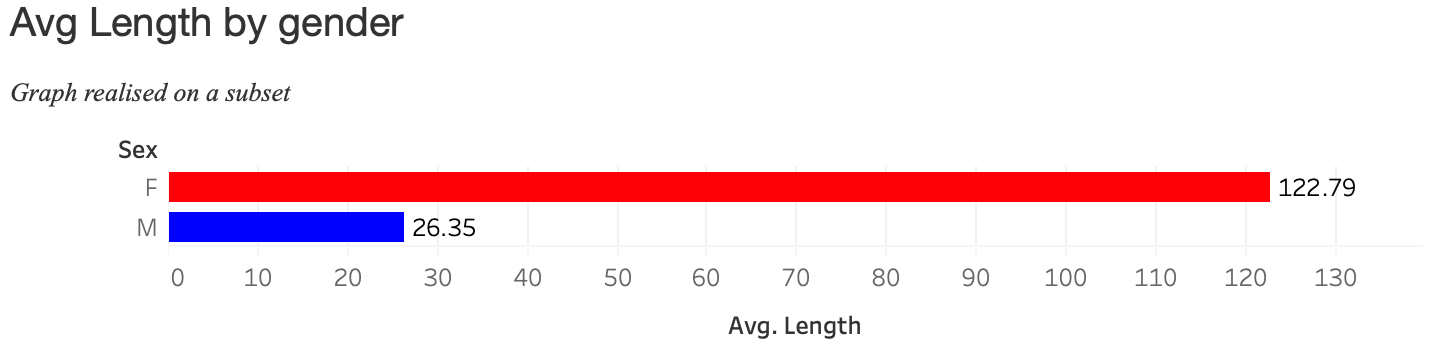

In [651]:
from IPython.display import Image
Image(filename="img/length_gender.png")

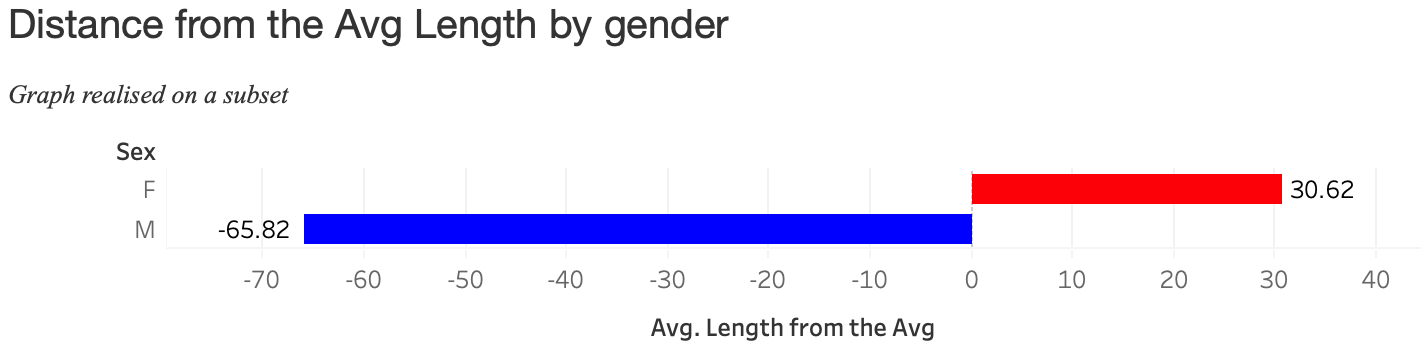

In [652]:
from IPython.display import Image
Image(filename="img/distance.png")

## 2) Extraction of the words and occurences

In [653]:
Occurence = []
Word = []
for i in df['Full_Wording']:
    b = Counter(i).values()
    c = Counter(i).keys()
    Occurence.append(b)
    Word.append(c)

In [654]:
df["Occurence"] = Occurence
df["Word"] = Word

### 3) Extraction of the unique value

In [655]:
Number_Unique = []
for i in df.Word:
    e = len(Counter(i).keys())
    Number_Unique.append(e) 

In [656]:
df["Unique_Value"] = Number_Unique

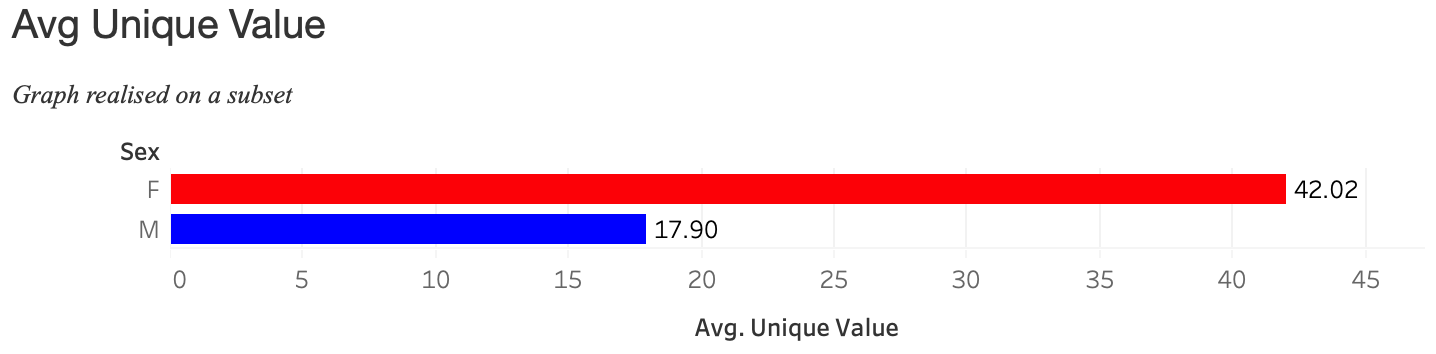

In [657]:
from IPython.display import Image
Image(filename="img/Unique.png")

### 4) Calculation to compare from the benchmark

In [658]:
mean_unique = df['Unique_Value'].mean()
std_unique = df['Unique_Value'].std()

mean_length = df['Length'].mean()
std_length = df['Length'].std()

In [659]:
df['Unique_from_the_Avg'] = df['Unique_Value'] - mean_unique
df['Unique_volatility'] = df['Unique_Value'] / std_unique

df['Length_from_the_Avg'] = df['Length'] - mean_length
df['Length_volatility'] = df['Unique_Value'] / std_length

In [660]:
df.head()

,Unnamed: 0,ID,keywords,age,sex,Full_Wording,Length,Occurence,Word,Unique_Value,Unique_from_the_Avg,Unique_volatility,Length_from_the_Avg,Length_volatility
0,5571877,4814904,les:1;high:1;leur:1;agent:1;des:1;comme:1;deve...,42,M,"[les, high, leur, agent, des, comme, developpe...",14,"(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)","(les, high, leur, agent, des, comme, developpe...",13,-5.258384,0.387096,-30.289219,0.108084
1,2029092,232820,anteflechi:1;guerlus:1;forum:1;affich:1;defini...,48,F,"[anteflechi, guerlus, forum, affich, definitio...",11,"(1, 1, 1, 1, 1, 1, 2, 1, 1)","(anteflechi, guerlus, forum, affich, definitio...",9,-9.258384,0.267990,-33.289219,0.074827
2,2718399,78339,epaule:1;forum:1;affich:1;craquements:1;douleu...,47,F,"[epaule, forum, affich, craquements, douleurs]",6,"(1, 1, 1, 1, 1)","(epaule, forum, affich, craquements, douleurs)",5,-13.258384,0.148883,-38.289219,0.041571
4,1209891,183059,tesla:1;embarrasse:1;ouragan:1;photo:10;ses:1;...,47,F,"[tesla, embarrasse, ouragan, photo, photo, pho...",98,"(1, 1, 1, 10, 1, 10, 1, 1, 10, 10, 1, 1, 1, 10...","(tesla, embarrasse, ouragan, photo, ses, prono...",25,6.741616,0.744416,53.710781,0.207853
5,763427,641104,journal:1;jean:1;kardashian:1;laura:1;enfants:...,54,F,"[journal, jean, kardashian, laura, enfants, le...",404,"(1, 1, 1, 1, 1, 43, 1, 1, 1, 1, 1, 1, 1, 43, 1...","(journal, jean, kardashian, laura, enfants, le...",106,87.741616,3.156322,359.710781,0.881299


### 5) Extracting the top frequencies

In [661]:
#df["Occurence"] = df["Occurence"].astype(str)

In [662]:
Max = []
for i in df.Occurence:
    i = max(i,default=0)
    Max.append(i)

In [663]:
df['Max_Frequence'] = Max

In [664]:
df = df.query('Max_Frequence > 1')

### 6) Extracting the top words

In [665]:
#df['Full_Wording'] = df['Full_Wording'].astype(str)

In [666]:
from collections import Counter

def Most_Common(lst):
    data = Counter(lst)
    return data.most_common(1)[0][0]

In [667]:
Top = []
for i in df['Full_Wording']:
    i = Most_Common(i)
    Top.append(i)    

In [668]:
df['Top_Word'] = Top

### 7) Extracting the words' typology

In [669]:
Typology = []
for i in df['Top_Word']:
    i = nltk.word_tokenize(i)
    e = nltk.pos_tag(i)
    Typology.append(e)

In [670]:
df['Typology'] = Typology

In [671]:
df['Typology'] = df['Typology'].astype(str)

In [672]:
Typology_2 = []
for i in df['Typology']:
    i = i.split(',', 1)[1]
    i = i[:-2]
    Typology_2.append(i)
df['Typology'] = Typology_2

# Creating the dataset for the modeling part

In [903]:
data = df[['age','sex', 'Length',
       'Unique_Value', 'Unique_from_the_Avg',
       'Unique_volatility', 'Length_from_the_Avg', 'Length_volatility',
       'Max_Frequence']].copy()

### Removing outliers

In [904]:
from scipy.stats import zscore
from scipy import stats
z_scores = stats.zscore(data.Length)

In [905]:
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
data = data[filtered_entries]

### Deleting the high correlations 

In [906]:
data.corr()

,age,Length,Unique_Value,Unique_from_the_Avg,Unique_volatility,Length_from_the_Avg,Length_volatility,Max_Frequence
age,1.000000,0.081781,0.078462,0.078462,0.078462,0.081781,0.078462,0.056322
Length,0.081781,1.000000,0.775133,0.775133,0.775133,1.000000,0.775133,0.810986
Unique_Value,0.078462,0.775133,1.000000,1.000000,1.000000,0.775133,1.000000,0.406050
Unique_from_the_Avg,0.078462,0.775133,1.000000,1.000000,1.000000,0.775133,1.000000,0.406050
Unique_volatility,0.078462,0.775133,1.000000,1.000000,1.000000,0.775133,1.000000,0.406050
Length_from_the_Avg,0.081781,1.000000,0.775133,0.775133,0.775133,1.000000,0.775133,0.810986
Length_volatility,0.078462,0.775133,1.000000,1.000000,1.000000,0.775133,1.000000,0.406050
Max_Frequence,0.056322,0.810986,0.406050,0.406050,0.406050,0.810986,0.406050,1.000000


In [907]:
del data['Length']

# Modeling Section 

### Note :  

Since the objective of the exercice is to predict both variables Age and Sex, we should 

evaluate in which order the modeling should be designed. In fact, the results of predicting 

sex and age will highly rely on having the sex and age variable or not. 

### Finding : 

Predicting Age in first is more relevant since the MSE using sex or not to predict 

Age has not impact. In fact, the difference is less than 0.001

## Modeling Sex Using Age variable

In [908]:
data.columns

Index(['age', 'sex', 'Unique_Value', 'Unique_from_the_Avg',
       'Unique_volatility', 'Length_from_the_Avg', 'Length_volatility',
       'Max_Frequence'],
      dtype='object')

In [909]:
#data = pd.get_dummies(data, columns=['Typology'], drop_first = False)

In [924]:
X = data.loc[:, data.columns !="sex"]
y = data.loc[:, data.columns =="sex"]

In [926]:
y = pd.get_dummies(y, drop_first=True)

In [912]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0, stratify = y)

In [913]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, n_estimators=100)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [914]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.50      0.45      0.47       486
           1       0.55      0.59      0.57       547

    accuracy                           0.53      1033
   macro avg       0.52      0.52      0.52      1033
weighted avg       0.52      0.53      0.52      1033



In [915]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred_rfc))

[[220 266]
 [223 324]]


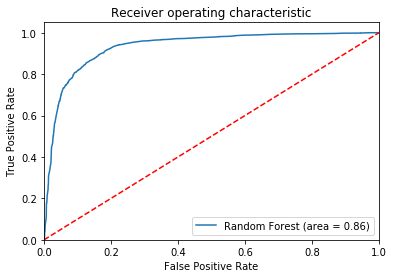

In [916]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y, rfc.predict(X)) 

plt.figure() 
fpr, tpr, thresholds = roc_curve(y, rfc.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc) 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic') 
plt.legend(loc="lower right") 
plt.savefig('Log_ROC') 
plt.show()

## Modeling Sex without Age variable

In [687]:
data_Sex_w_Age = df[['sex', 'Length',
       'Unique_Value', 'Unique_from_the_Avg',
       'Unique_volatility', 'Length_from_the_Avg', 'Length_volatility',
       'Max_Frequence']].copy()

In [688]:
data_Sex_w_Age = pd.get_dummies(data_Sex_w_Age, columns=['sex','Typology'])

In [689]:
X_w_Age = data_Sex_w_Age.loc[:, data_Sex_w_Age.columns !="sex"]
y_w_Age = data_Sex_w_Age.loc[:, data_Sex_w_Age.columns =="sex"]

In [690]:
y_w_Age = pd.get_dummies(y_w_Age, drop_first=True)

In [691]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_w_Age,y_w_Age,test_size = 0.25, random_state = 0)

In [692]:
from sklearn.ensemble import RandomForestClassifier
rfc_w_Age = RandomForestClassifier(random_state=0, n_estimators=100)
rfc_w_Age.fit(X_train, y_train)
pred_rfc_w_Age = rfc_w_Age.predict(X_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [693]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rfc_w_Age))

              precision    recall  f1-score   support

           0       0.51      0.44      0.47       525
           1       0.51      0.58      0.55       533

    accuracy                           0.51      1058
   macro avg       0.51      0.51      0.51      1058
weighted avg       0.51      0.51      0.51      1058



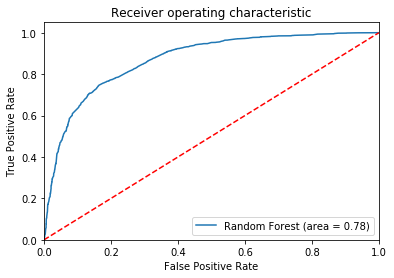

In [694]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_w_Age, rfc_w_Age.predict(X_w_Age)) 

plt.figure() 
fpr, tpr, thresholds = roc_curve(y_w_Age, rfc_w_Age.predict_proba(X_w_Age)[:,1]) 
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc) 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic') 
plt.legend(loc="lower right") 
plt.savefig('Log_ROC') 
plt.show()

## Modeling Age using Sex variable

In [695]:
# Creating a dataset for Age 
data_Age = df[['age', 'sex',
       'Unique_Value', 'Unique_from_the_Avg',
       'Unique_volatility', 'Length_from_the_Avg', 'Length_volatility',
       'Max_Frequence', 'Typology']].copy()

In [696]:
data_Age = pd.get_dummies(data_Age, columns=['sex','Typology'])

In [697]:
X_AGE = data_Age.loc[:, data_Age.columns !="age"]
y_AGE = data_Age.loc[:, data_Age.columns =="age"]

In [698]:
from sklearn.model_selection import train_test_split
X_train_AGE, X_test_AGE, y_train_AGE, y_test_AGE = train_test_split(X_AGE,y_AGE,test_size = 0.25, random_state=0)

In [699]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression ()
regressor.fit(X_train_AGE,y_train_AGE)
y_pred = regressor.predict(X_test_AGE)

In [700]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_AGE, y_pred)

171.90513259221774

## Modeling Age without Sex variable

In [756]:
data_w_Sex = df[['age',
       'Unique_Value', 'Unique_from_the_Avg',
       'Unique_volatility', 'Length_from_the_Avg', 'Length_volatility',
       'Max_Frequence']].copy()

In [757]:
#data_w_Sex = pd.get_dummies(data_w_Sex, columns=['Typology'], drop_first = False)

In [758]:
X_w_SEX = data_w_Sex.loc[:, data_w_Sex.columns !="age"]
y_w_SEX = data_w_Sex.loc[:, data_w_Sex.columns =="age"]

In [759]:
from sklearn.model_selection import train_test_split
X_train_w_AGE, X_test_w_AGE, y_train_w_AGE, y_test_w_AGE = train_test_split(X_w_SEX,y_w_SEX,test_size = 0.25, random_state=0)

In [767]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression ()
regressor.fit(X_train_w_AGE,y_train_w_AGE)
y_pred_w_SEX = regressor.predict(X_test_w_AGE)

In [761]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_w_AGE, y_pred_w_SEX)

171.1552624563122

# Test set

In [707]:
test = pd.read_csv("/Users/antoineguerrini/Downloads/test_2.csv",error_bad_lines=False)

In [708]:
test1 = test.sample(frac=0.015, replace=True, random_state=42)

In [709]:
test1.to_excel('test1.xlsx')

In [726]:
df_test = pd.read_excel("/Users/antoineguerrini/Desktop/test1.xlsx", error_bad_lines=False)

In [727]:
df_test.dropna(subset=['keywords'], inplace=True)

(4229, 17)

In [728]:
from nltk.corpus import stopwords
c = stopwords.words('french')

In [729]:
import string
nopunc = [char for char in df_test if char not in string.punctuation]

In [730]:
df_test["Full_Wording"] = df_test["keywords"].apply(processing)

In [733]:
preparation(df_test)

In [734]:
df_test = df_test.query('Max_Frequence > 1')

In [735]:
wording_preparation(df_test)

In [874]:
Test_Sex = df_test[['Unique_Value', 'Unique_from_the_Avg',
       'Unique_volatility', 'Length_from_the_Avg', 'Length_volatility',
       'Max_Frequence']].copy()

In [875]:
Test_Sex.dtypes

Unique_Value             int64
Unique_from_the_Avg    float64
Unique_volatility      float64
Length_from_the_Avg    float64
Length_volatility      float64
Max_Frequence            int64
dtype: object

In [877]:
predictions = regressor.predict(Test_Sex)

In [878]:
Test_Sex['age'] = predictions

In [943]:
Test_Sex['age'].head()

2     45.702184
4     48.432238
8     45.720842
13    45.586274
15    45.658930
Name: age, dtype: float64

In [880]:
Test_Sex.isnull().sum()

Unique_Value           0
Unique_from_the_Avg    0
Unique_volatility      0
Length_from_the_Avg    0
Length_volatility      0
Max_Frequence          0
age                    0
dtype: int64

In [917]:
Test_Gender = df_test[['Unique_Value', 'Unique_from_the_Avg',
       'Unique_volatility', 'Length_from_the_Avg', 'Length_volatility',
       'Max_Frequence']].copy()

In [918]:
Test_Gender['age'] = Test_Sex['age']

In [920]:
predictions_gender = pd.DataFrame(rfc.predict(Test_Gender))

In [922]:
Test_Gender['sex'] = predictions_gender

In [937]:
Test_Gender.head()

,Unique_Value,Unique_from_the_Avg,Unique_volatility,Length_from_the_Avg,Length_volatility,Max_Frequence,age,sex
2,12,-5.572585,0.393298,-28.58252,0.093399,2,45.702184,M
4,112,94.427415,3.670781,675.41748,0.871720,43,48.432238,M
8,11,-6.572585,0.360523,-24.58252,0.085615,3,45.720842,M
13,5,-12.572585,0.163874,-36.58252,0.038916,2,45.586274,M
15,7,-10.572585,0.229424,-33.58252,0.054483,3,45.658930,M


In [942]:
# Computing the sex

sex = []

for i in Test_Gender.sex:
    if i == 0:
        sex.append('F')
    else:
        sex.append('M')
        
Test_Gender['sex'] = sex

# Exporting the outputs

In [939]:
Results = Test_Gender[['sex','age']]
Results['id'] = df_test['ID']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [940]:
Results.head()

,sex,age,id
2,M,45.702184,2229085
4,M,48.432238,1692744
8,M,45.720842,3097043
13,M,45.586274,2272356
15,M,45.658930,278168


In [941]:
Results.to_csv('Results_On_Test_Subset.csv')